In [1]:
import configurations as cfg
import pandas as pd
import os
import csv

In [2]:
data_path = cfg.DATA_PATH
dataset_filename = cfg.DATASET_FILE
dataset_filename_pickle = cfg.DATASET_PICKLE_FILE
dataset_name = cfg.DATASET_NAME

In [3]:
def setup_folders(model_name):
    metrics_path = os.path.join('.', 'metrics')
    os.makedirs(metrics_path, exist_ok=True)
    
    evaluation_path = os.path.join('.', 'evaluation')
    os.makedirs(evaluation_path, exist_ok=True)

    model_path = os.path.join(metrics_path, model_name)
    os.makedirs(model_path, exist_ok=True)
    
def create_evaluation_folder_and_csv(store):
    model_name, threshold, f1, precision, recall, tp, fp, fn, tn, loss, roc_auc, embeddings_shape = store
    csv_file_path = os.path.join('.', 'evaluation', f'all_evaluations.csv')
    file_exists = os.path.isfile(csv_file_path)
    
    with open(csv_file_path, mode='a', newline='') as file:  # Change mode to 'a' for append
        writer = csv.writer(file)
        if not file_exists:  # Write headers only if the file is being created
            headers = ['Model Name', 'Threshold','F1','Precision', 'Recall', 'TP', 'FP', 'FN', 'TN', 'Loss', 'ROC AUC', 'Embeddings Shape']
            writer.writerow(headers)
        metrics_row = [model_name, threshold, f1, precision, recall, tp, fp, fn, tn, loss, roc_auc, str(embeddings_shape)]
        writer.writerow(metrics_row)
    
    print(f"Metrics saved successfully in {csv_file_path}")

def evaluate(model_name):
    setup_folders(model_name)  # Ensure all directories are created before processing
    
    # ETL
    from extract_transform_load import ETLProcessor
    etl_processor = ETLProcessor(dataset_filename, dataset_filename_pickle)
    etl_processor.load_and_process_data()
    
    # Generate Embeddings
    from generate_embeddings import EmbeddingsPipeline
    embeddings_pipeline = EmbeddingsPipeline(dataset_filename_pickle, model_name)
    embeddings_pipeline.process()
    
    embeddings_filename = f'{data_path}mozilla_firefox_embeddings_{model_name}.pkl'
    embeddings_df = pd.read_pickle(embeddings_filename)
    
    # Evaluate Embeddings
    from evaluate_embeddings import EmbeddingEvaluator
    evaluator = EmbeddingEvaluator(dataset_name, model_name, embeddings_df)
    
    f1, precision, recall, threshold, tp, fp, fn, tn = evaluator.compute_f1()
    loss = evaluator.compute_crossEntropy()
    roc_auc = evaluator.compute_roc_auc()
    store = [model_name, threshold, f1, precision, recall, tp, fp, fn, tn, loss, roc_auc, embeddings_df.shape]
    
    create_evaluation_folder_and_csv(store)

/mnt/c/Users/ncian/OneDrive/Desktop/CMPT413-Final-Project/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Embeddings file created: mozilla_firefox_embeddings_mixedbread-ai/mxbai-embed-large-v1


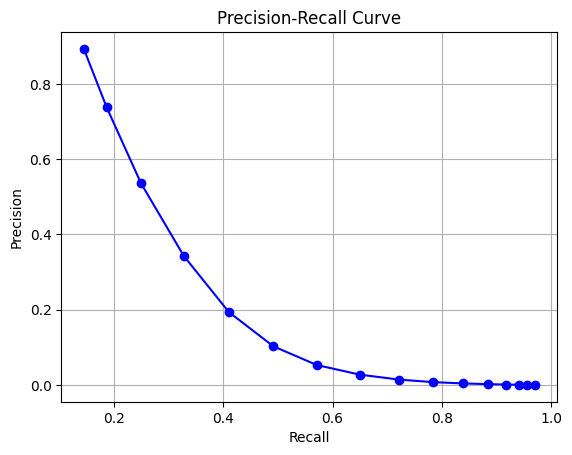

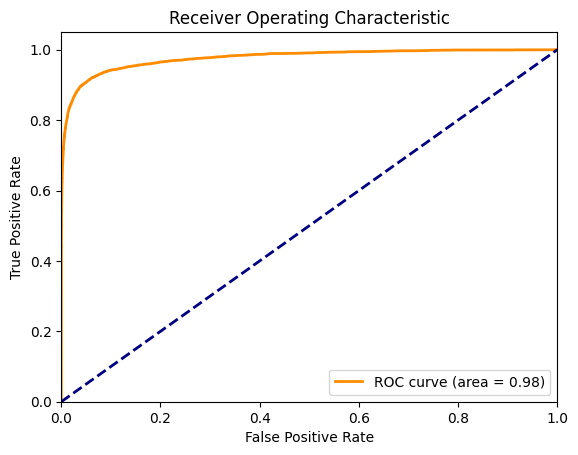

Metrics saved successfully in ./evaluation/all_evaluations.csv
Embeddings file created: mozilla_firefox_embeddings_intfloat/multilingual-e5-large-instruct


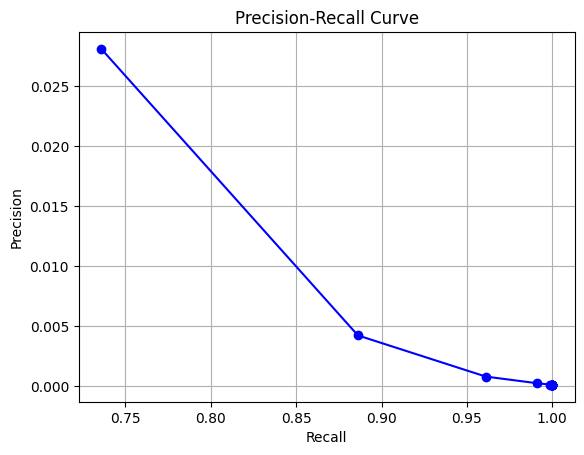

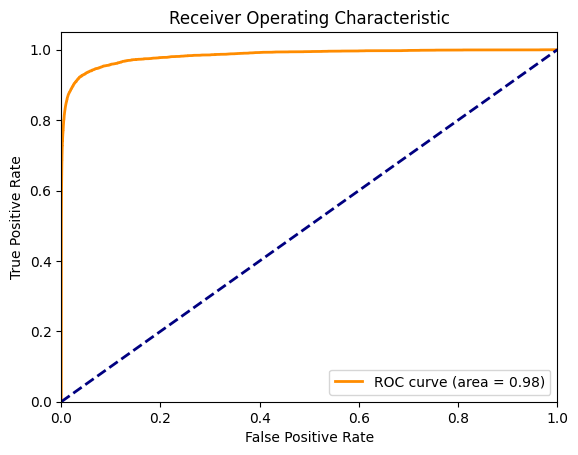

Metrics saved successfully in ./evaluation/all_evaluations.csv
Embeddings file created: mozilla_firefox_embeddings_avsolatorio/GIST-large-Embedding-v0


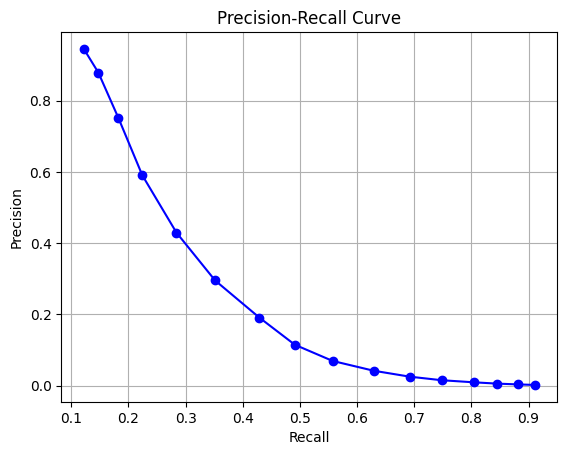

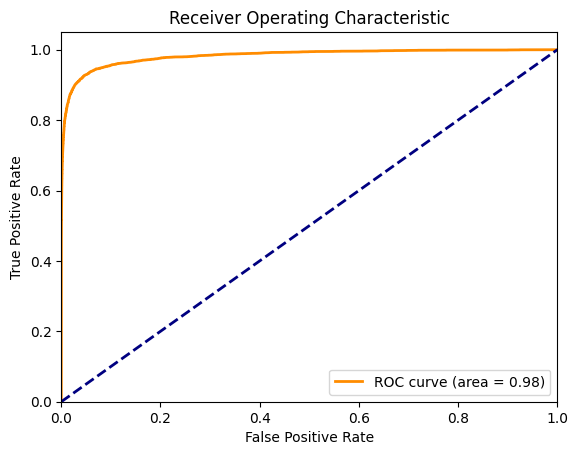

Metrics saved successfully in ./evaluation/all_evaluations.csv
Embeddings file created: mozilla_firefox_embeddings_llmrails/ember-v1


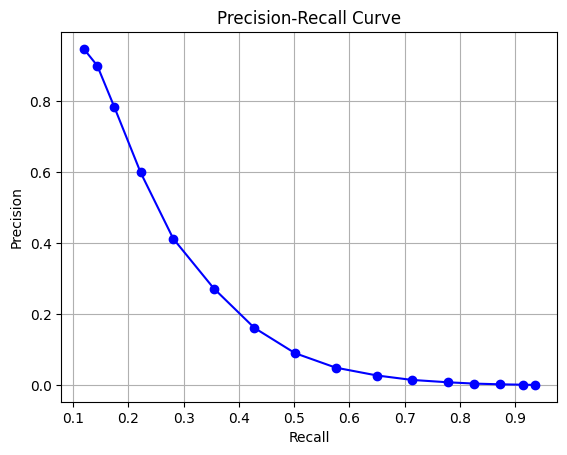

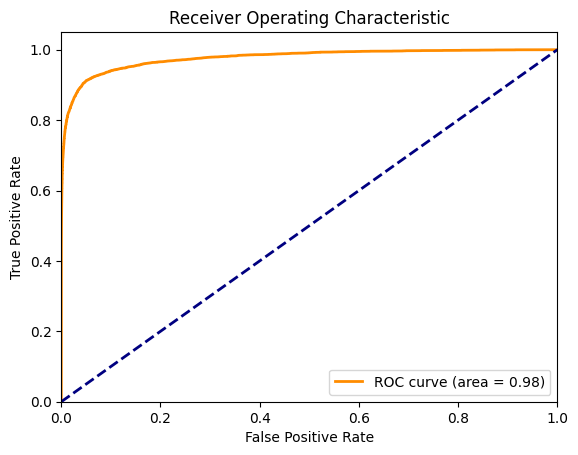

Metrics saved successfully in ./evaluation/all_evaluations.csv


In [4]:
for model in cfg.MODEL_NAMES:
    evaluate(model)